<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.275845,28.670017,61.873019,1.470983e-05,176.818896,176.818872,2.405343e-05
1,0.0,1.0,63.482924,78.885991,31.234329,-2.376353e-06,183.603242,183.603250,-7.841039e-06
2,0.0,2.0,87.688074,76.561000,30.373938,1.134846e-06,204.623014,204.623013,8.189218e-07
3,0.0,3.0,62.803674,28.637462,56.722085,-2.381249e-05,158.163197,158.163215,-1.807576e-05
4,0.0,4.0,90.597778,59.458674,30.609663,-1.969542e-07,190.666115,190.666112,2.550015e-06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.422223,40.866387,35.457732,1.001628e-05,163.746352,163.746347,5.311054e-06
19996,999.0,16.0,78.146502,82.862667,92.492950,-1.491786e-07,263.502119,263.502118,9.304533e-07
19997,999.0,17.0,76.641161,69.149364,75.796457,1.425358e-07,231.586982,231.586982,-4.502611e-07
19998,999.0,18.0,33.309668,53.516403,49.232137,-3.365950e-06,146.058205,146.058208,-3.486247e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.275845,28.670017,61.873019,1.470983e-05,176.818896,176.818872,2.405343e-05
1,0.0,1.0,63.482924,78.885991,31.234329,-2.376353e-06,183.603242,183.603250,-7.841039e-06
2,0.0,2.0,87.688074,76.561000,30.373938,1.134846e-06,204.623014,204.623013,8.189218e-07
3,0.0,3.0,62.803674,28.637462,56.722085,-2.381249e-05,158.163197,158.163215,-1.807576e-05
4,0.0,4.0,90.597778,59.458674,30.609663,-1.969542e-07,190.666115,190.666112,2.550015e-06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.422223,40.866387,35.457732,1.001628e-05,163.746352,163.746347,5.311054e-06
19996,999.0,16.0,78.146502,82.862667,92.492950,-1.491786e-07,263.502119,263.502118,9.304533e-07
19997,999.0,17.0,76.641161,69.149364,75.796457,1.425358e-07,231.586982,231.586982,-4.502611e-07
19998,999.0,18.0,33.309668,53.516403,49.232137,-3.365950e-06,146.058205,146.058208,-3.486247e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    76.275845  28.670017  ...  176.818872  2.405343e-05
      1.0    63.482924  78.885991  ...  183.603250 -7.841039e-06
      2.0    87.688074  76.561000  ...  204.623013  8.189218e-07
      3.0    62.803674  28.637462  ...  158.163215 -1.807576e-05
      4.0    90.597778  59.458674  ...  190.666112  2.550015e-06
...                ...        ...  ...         ...           ...
999.0 15.0   77.422223  40.866387  ...  163.746347  5.311054e-06
      16.0   78.146502  82.862667  ...  263.502118  9.304533e-07
      17.0   76.641161  69.149364  ...  231.586982 -4.502611e-07
      18.0   33.309668  53.516403  ...  146.058208 -3.486247e-06
      19.0   90.966126  28.463273  ...  157.365558  3.402849e-06

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    76.275845  28.670017  ...  176.818872  2.405343e-05
      1.0    63.482924  78.885991  ...  183.603250 -7.841039e-06
      2.0    87.688074  76.561000  ...  204.623013  8.189218e-07
      3.0    62.803674  28.637462  ...  158.163215 -1.807576e-05
      4.0    90.597778  59.458674  ...  190.666112  2.550015e-06
...                ...        ...  ...         ...           ...
999.0 15.0   77.422223  40.866387  ...  163.746347  5.311054e-06
      16.0   78.146502  82.862667  ...  263.502118  9.304533e-07
      17.0   76.641161  69.149364  ...  231.586982 -4.502611e-07
      18.0   33.309668  53.516403  ...  146.058208 -3.486247e-06
      19.0   90.966126  28.463273  ...  157.365558  3.402849e-06

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.275845,28.670017,61.873019,1.470983e-05,176.818896,176.818872,2.405343e-05
1,0.0,1.0,63.482924,78.885991,31.234329,-2.376353e-06,183.603242,183.603250,-7.841039e-06
2,0.0,2.0,87.688074,76.561000,30.373938,1.134846e-06,204.623014,204.623013,8.189218e-07
3,0.0,3.0,62.803674,28.637462,56.722085,-2.381249e-05,158.163197,158.163215,-1.807576e-05
4,0.0,4.0,90.597778,59.458674,30.609663,-1.969542e-07,190.666115,190.666112,2.550015e-06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.422223,40.866387,35.457732,1.001628e-05,163.746352,163.746347,5.311054e-06
19996,999.0,16.0,78.146502,82.862667,92.492950,-1.491786e-07,263.502119,263.502118,9.304533e-07
19997,999.0,17.0,76.641161,69.149364,75.796457,1.425358e-07,231.586982,231.586982,-4.502611e-07
19998,999.0,18.0,33.309668,53.516403,49.232137,-3.365950e-06,146.058205,146.058208,-3.486247e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    76.275845  28.670017  ...  176.818872  2.405343e-05
      1.0    63.482924  78.885991  ...  183.603250 -7.841039e-06
      2.0    87.688074  76.561000  ...  204.623013  8.189218e-07
      3.0    62.803674  28.637462  ...  158.163215 -1.807576e-05
      4.0    90.597778  59.458674  ...  190.666112  2.550015e-06
...                ...        ...  ...         ...           ...
999.0 15.0   77.422223  40.866387  ...  163.746347  5.311054e-06
      16.0   78.146502  82.862667  ...  263.502118  9.304533e-07
      17.0   76.641161  69.149364  ...  231.586982 -4.502611e-07
      18.0   33.309668  53.516403  ...  146.058208 -3.486247e-06
      19.0   90.966126  28.463273  ...  157.365558  3.402849e-06

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

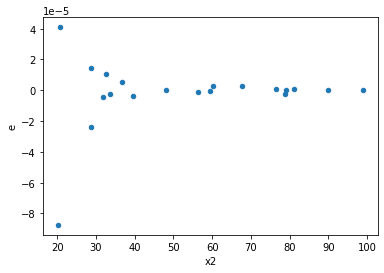

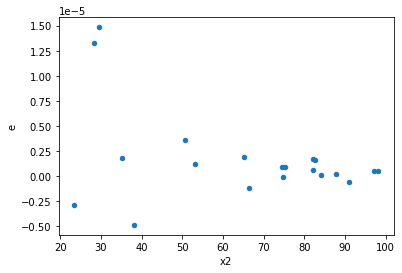

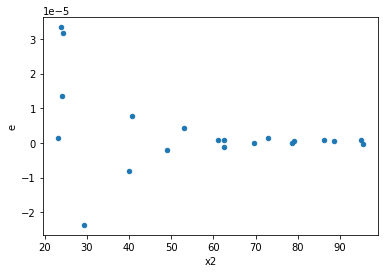

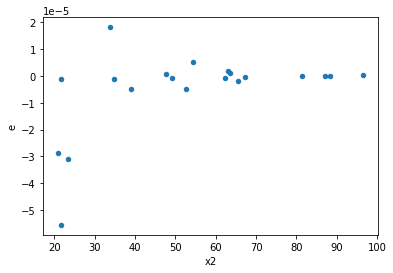

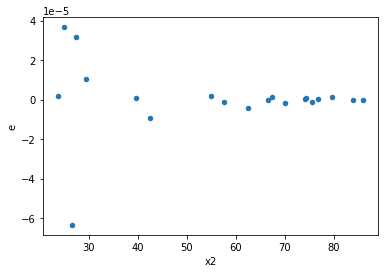

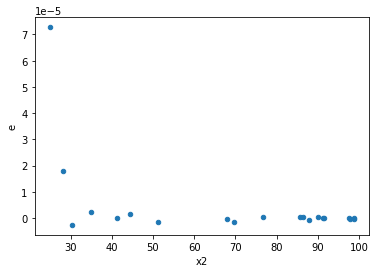

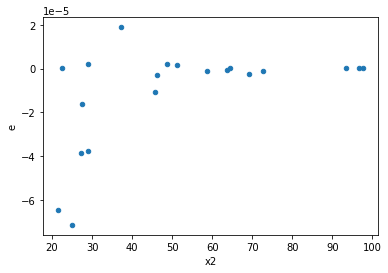

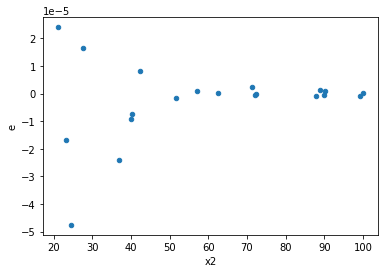

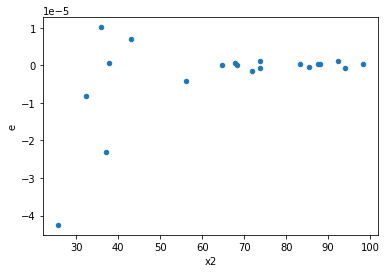

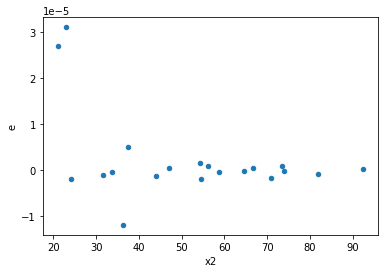

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,8.904520090433868e-12,7.1295187799131005e-09,2.226130022608467e-12,1.7823796949782751e-09,0.0012489650936219853,5.963053359074612e-07,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,2.4212284905916595e-12,2.1984260688455076e-10,6.053071226479149e-13,5.496065172113769e-11,0.011013463335899922,0.00013300207448845445,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,7.653569362020677e-13,1.4210757774669013e-09,1.9133923405051693e-13,3.552689443667253e-10,0.0005385757384214466,7.299795278829406e-08,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,8.80467278925613e-12,2.0122794600618083e-09,2.2011681973140324e-12,5.030698650154521e-10,0.004375472176705361,1.3546302667925078e-05,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,6.755058546963368e-12,2.7851336774102833e-09,1.688764636740842e-12,6.962834193525708e-10,0.0024253983217223754,3.1205387586549888e-06,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,5.605201267313227e-13,1.9352407416748046e-09,1.4013003168283068e-13,4.838101854187011e-10,0.0002896384489333533,1.549602073998668e-08,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,2.4656812352100773e-12,2.9746385252210002e-09,6.164203088025193e-13,7.436596313052501e-10,0.0008289011301051747,2.142893430017339e-07,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,2.1911811245240676e-12,3.1887540038644507e-09,5.477952811310169e-13,7.971885009661127e-10,0.0006871590351179726,1.3415490741751448e-07,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,3.5473469201552557e-13,2.54178119621034e-10,8.868367300388139e-14,6.35445299052585e-11,0.001395614589266834,7.866464073000144e-07,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    987
Reject005=1 : Homoscedasticity       13
Name: Result_test, dtype: int64